<a href="https://colab.research.google.com/github/golden7187/porter_assignment/blob/main/porter_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PORTER ASSIGNMENT**

**NAME - GOLDEN KUMAR**

**Part 1: Data Preparation**

**1.1 importing dependencies**

In [ ]:
import pandas as pd

**1.2 -  Load a CSV file into a Pandas DataFrame**

In [ ]:
dataset = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')

**1.3 - Display bottom 5 rows of the dataset**

In [ ]:
dataset.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


**1.4 - finding shape of our dataset**

In [ ]:
dataset.shape

(307645, 9)

In [ ]:
print("Number of Rows",dataset.shape[0])
print("Number of Columns",dataset.shape[1])

Number of Rows 307645
Number of Columns 9


**1.5 - Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


**1.6 - Check Null Values (number of missing values) In The Dataset**

In [ ]:
dataset.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

**1.7 dropping missing values**

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

**1.8 - Remove duplicates**

In [ ]:
dataset.drop_duplicates(inplace=True)

**1.9 - check shape after cleaning of data**

In [ ]:
dataset.shape

(307477, 9)

**Part 2: Exploratory Data Analysis**

**2.1 - importing dependencies for data visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.2 - calculation and visualize each year's total sales (retail and warehouse).**


   YEAR  RETAIL SALES  WAREHOUSE SALES
0  2017     686734.57       2340495.13
1  2018     153595.90        519748.19
2  2019     958179.83       3555701.23
3  2020     354949.09       1386456.73


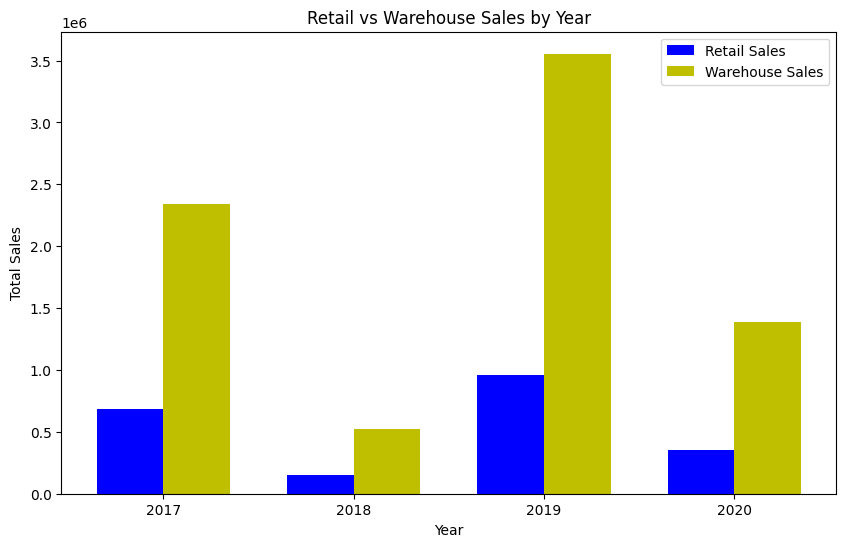

In [ ]:
#filter the column as per requirment
filtered_data = dataset[['YEAR', 'RETAIL SALES', 'WAREHOUSE SALES']]

# Calculate total sales for each year
yearly_sales = dataset.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Group data by year and sum the sales for each year
yearly_sales = filtered_data.groupby('YEAR').sum()

# Reset the index to make 'YEAR' a regular column
yearly_sales.reset_index(inplace=True)

# Display the resulting DataFrame
print(yearly_sales)

# Set the width of the bars
bar_width = 0.35

# Create a bar plot to visualize yearly sales with separate bars for retail and warehouse
plt.figure(figsize=(10, 6))

# Position of each year on the x-axis
years = yearly_sales['YEAR']
x = range(len(years))

# Plot retail sales in blue
plt.bar(x, yearly_sales['RETAIL SALES'], width=bar_width, label='Retail Sales', color='b', align='center')

# Plot warehouse sales in green, shifted to the right
plt.bar([i + bar_width for i in x], yearly_sales['WAREHOUSE SALES'], width=bar_width, label='Warehouse Sales', color='y', align='center')

# Set x-axis labels to be the years
plt.xticks([i + bar_width / 2 for i in x], years)

# Label the axes and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Retail vs Warehouse Sales by Year')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**2.3 CALCULATING TOP 5 SUPPLIER BY TOTAL NUMBER OF SALES**

In [ ]:
# Group the data by 'SUPPLIER' and calculate the total sales for each supplier
supplier_sales = dataset.groupby('SUPPLIER')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

# Calculate the total sales (retail + warehouse) for each supplier
supplier_sales['TOTAL SALES'] = supplier_sales['RETAIL SALES'] + supplier_sales['WAREHOUSE SALES']

# Sort the suppliers by total sales in descending order and select the top 5
top_5_suppliers = supplier_sales.sort_values(by='TOTAL SALES', ascending=False).head(5)

# Reset the index to have 'SUPPLIER' as a regular column
top_5_suppliers.reset_index(inplace=True)

# Display the top 5 suppliers
print(top_5_suppliers[['SUPPLIER', 'TOTAL SALES']])


                 SUPPLIER  TOTAL SALES
0           CROWN IMPORTS   1736309.17
1  MILLER BREWING COMPANY   1512585.15
2      ANHEUSER BUSCH INC   1441131.66
3            HEINEKEN USA    885936.37
4      E & J GALLO WINERY    363634.31


**2.4 - VISUALIZING TOP 5 SUPPLIER BY TOTAL NUMBER OF SALES**

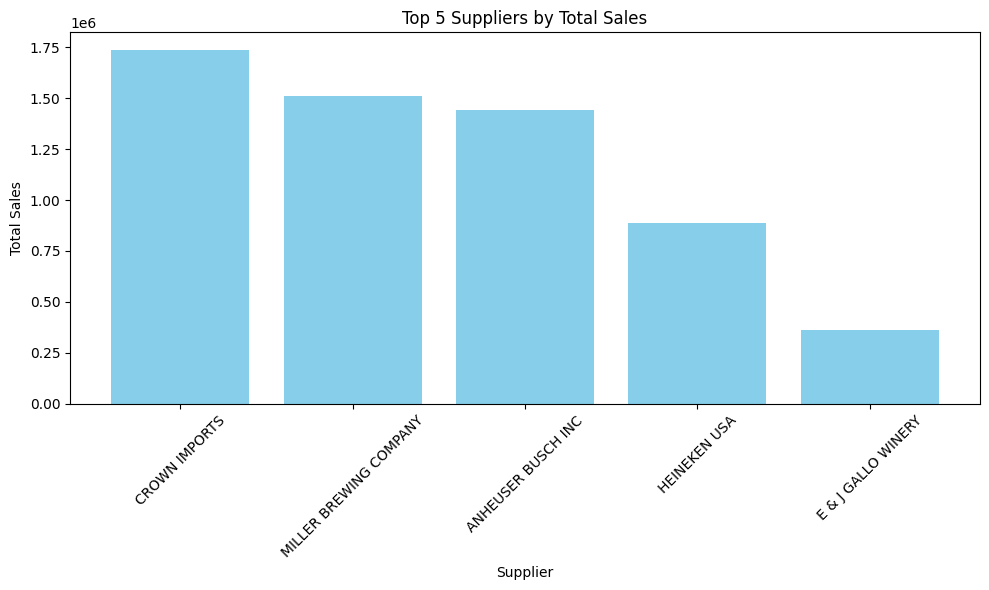

In [ ]:
# Sort the suppliers by total sales in descending order and select the top 5
top_5_suppliers = supplier_sales.sort_values(by='TOTAL SALES', ascending=False).head(5)

# Reset the index to have 'SUPPLIER' as a regular column
top_5_suppliers.reset_index(inplace=True)

# Create a bar plot for the top 5 suppliers
plt.figure(figsize=(10, 6))
plt.bar(top_5_suppliers['SUPPLIER'], top_5_suppliers['TOTAL SALES'], color='skyblue')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.title('Top 5 Suppliers by Total Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


**2.5 - CALCULATING TOP 10 BEST SELLING ITEM**

In [ ]:
# Group the data by 'ITEM CODE', 'ITEM DESCRIPTION', and 'ITEM TYPE' and calculate the total sales for each item
item_sales = dataset.groupby(['ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

# Calculate the total sales (retail + warehouse) for each item
item_sales['TOTAL SALES'] = item_sales['RETAIL SALES'] + item_sales['WAREHOUSE SALES']

# Sort the items by total sales in descending order and select the top 10
top_10_items = item_sales.sort_values(by='TOTAL SALES', ascending=False).head(10)

# Reset the index to make the item information accessible
top_10_items.reset_index(inplace=True)

# Display the top 10 best-selling items along with their descriptions and types
print(top_10_items[['ITEM DESCRIPTION', 'ITEM TYPE', 'TOTAL SALES']])


                     ITEM DESCRIPTION ITEM TYPE  TOTAL SALES
0        CORONA EXTRA LOOSE NR - 12OZ      BEER    328224.83
1         CORONA EXTRA 2/12 NR - 12OZ      BEER    257679.62
2            HEINEKEN LOOSE NR - 12OZ      BEER    189711.21
3             HEINEKEN 2/12 NR - 12OZ      BEER    162224.15
4         MILLER LITE 30PK CAN - 12OZ      BEER    148926.40
5          CORONA EXTRA 4/6 NR - 12OZ      BEER    132665.61
6  MODELO ESPECIAL 24 LOOSE NR - 12OZ      BEER    121846.80
7                  BUD LIGHT 30PK CAN      BEER    108615.97
8              HEINEKEN 4/6 NR - 12OZ      BEER    105184.92
9         CORONA EXTRA 18PK NR - 12OZ      BEER    100664.44


**2.6 - VISUALIZING TOP 10 BEST SELLING ITEMS**

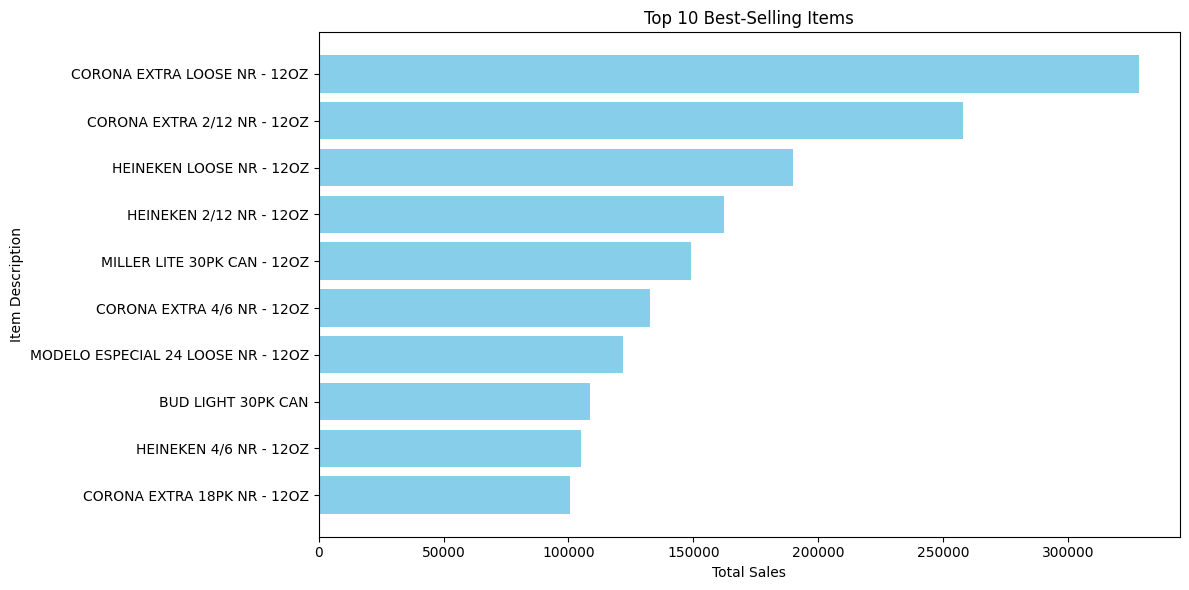

In [ ]:
# Sort the items by total sales in descending order and select the top 10
top_10_items = item_sales.sort_values(by='TOTAL SALES', ascending=False).head(10)

# Reset the index to make the item information accessible
top_10_items.reset_index(inplace=True)

# Create a bar plot for the top 10 best-selling items
plt.figure(figsize=(12, 6))
plt.barh(top_10_items['ITEM DESCRIPTION'], top_10_items['TOTAL SALES'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Item Description')
plt.title('Top 10 Best-Selling Items')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest sales at the top

# Show the plot
plt.tight_layout()
plt.show()


**PART 3 : Business Analysis**





**3.1 - Calculating the monthly average retail sales and warehouse sales separately for each year.**

In [ ]:
# Group the data by 'YEAR' and 'MONTH' and calculate the monthly average for retail and warehouse sales
monthly_average_sales = dataset.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].mean().reset_index()

# Separate retail and warehouse sales data
retail_monthly_average = monthly_average_sales[['YEAR', 'MONTH', 'RETAIL SALES']]
warehouse_monthly_average = monthly_average_sales[['YEAR', 'MONTH', 'WAREHOUSE SALES']]

# Display the monthly average retail sales and warehouse sales separately for each year
print("Monthly Average Retail Sales:")
print(retail_monthly_average)

print("\nMonthly Average Warehouse Sales:")
print(warehouse_monthly_average)

Monthly Average Retail Sales:
    YEAR  MONTH  RETAIL SALES
0   2017      6      7.145487
1   2017      7      7.114624
2   2017      8      6.411406
3   2017      9      6.758769
4   2017     10      6.550944
5   2017     11      6.766893
6   2017     12      9.080119
7   2018      1      5.680690
8   2018      2      5.940607
9   2019      1      6.143881
10  2019      2      6.521822
11  2019      3      6.660169
12  2019      4      6.311545
13  2019      5      7.335529
14  2019      6      7.371886
15  2019      7      7.264269
16  2019      8      7.304384
17  2019      9      6.615581
18  2019     10      6.677625
19  2019     11      7.850055
20  2020      1      6.157127
21  2020      3      9.450849
22  2020      7      8.208838
23  2020      9      6.971839

Monthly Average Warehouse Sales:
    YEAR  MONTH  WAREHOUSE SALES
0   2017      6        27.850703
1   2017      7        24.342291
2   2017      8        28.181033
3   2017      9        22.862328
4   2017     10      

**3.2 - visualizing the monthly average retail sales and warehouse sales separately for each year.**

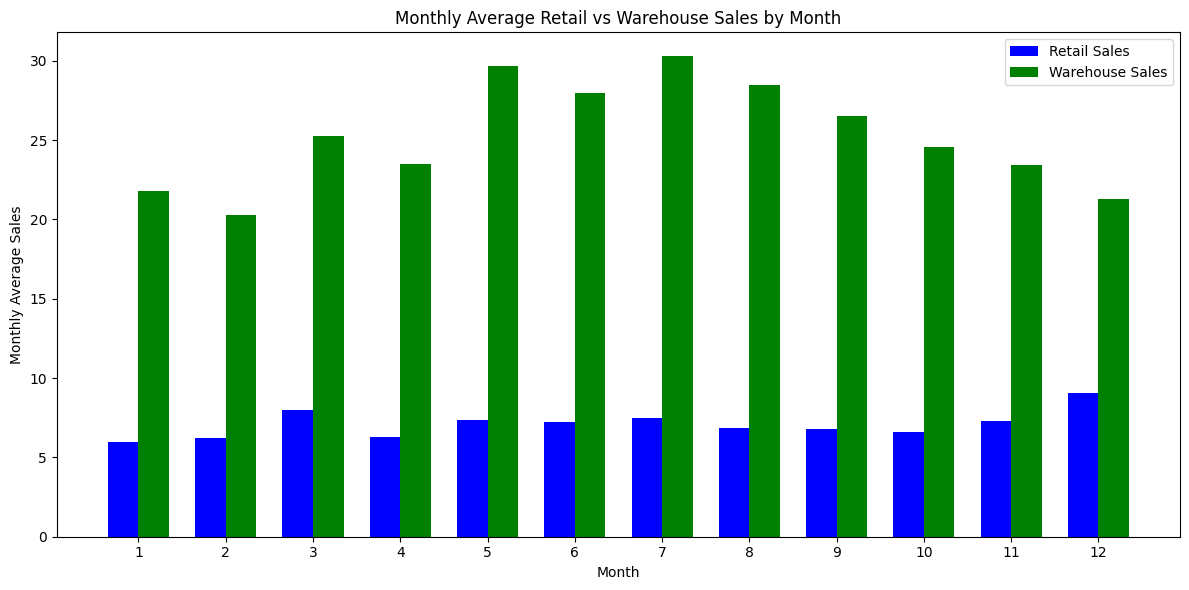

In [ ]:
# Filter the columns you need (MONTH, RETAIL SALES, WAREHOUSE SALES)
filtered_data = dataset[['MONTH', 'RETAIL SALES', 'WAREHOUSE SALES']]

# Group data by month and calculate the monthly average sales for each month
monthly_average_sales = filtered_data.groupby('MONTH').mean().reset_index()

# Set the width of the bars
bar_width = 0.35

# Create a bar plot to visualize monthly average sales with separate bars for retail and warehouse
plt.figure(figsize=(12, 6))

# Position of each month on the x-axis
months = monthly_average_sales['MONTH']
x = range(len(months))

# Plot monthly average retail sales in blue
plt.bar(x, monthly_average_sales['RETAIL SALES'], width=bar_width, label='Retail Sales', color='b', align='center')

# Plot monthly average warehouse sales in green, shifted to the right
plt.bar([i + bar_width for i in x], monthly_average_sales['WAREHOUSE SALES'], width=bar_width, label='Warehouse Sales', color='g', align='center')

# Set x-axis labels to be the months
plt.xticks([i + bar_width / 2 for i in x], months)

# Label the axes and title
plt.xlabel('Month')
plt.ylabel('Monthly Average Sales')
plt.title('Monthly Average Retail vs Warehouse Sales by Month')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**3.3 - Analyse whether there are any seasonal trends in sales data. Provide visualisations to support your analysis.**

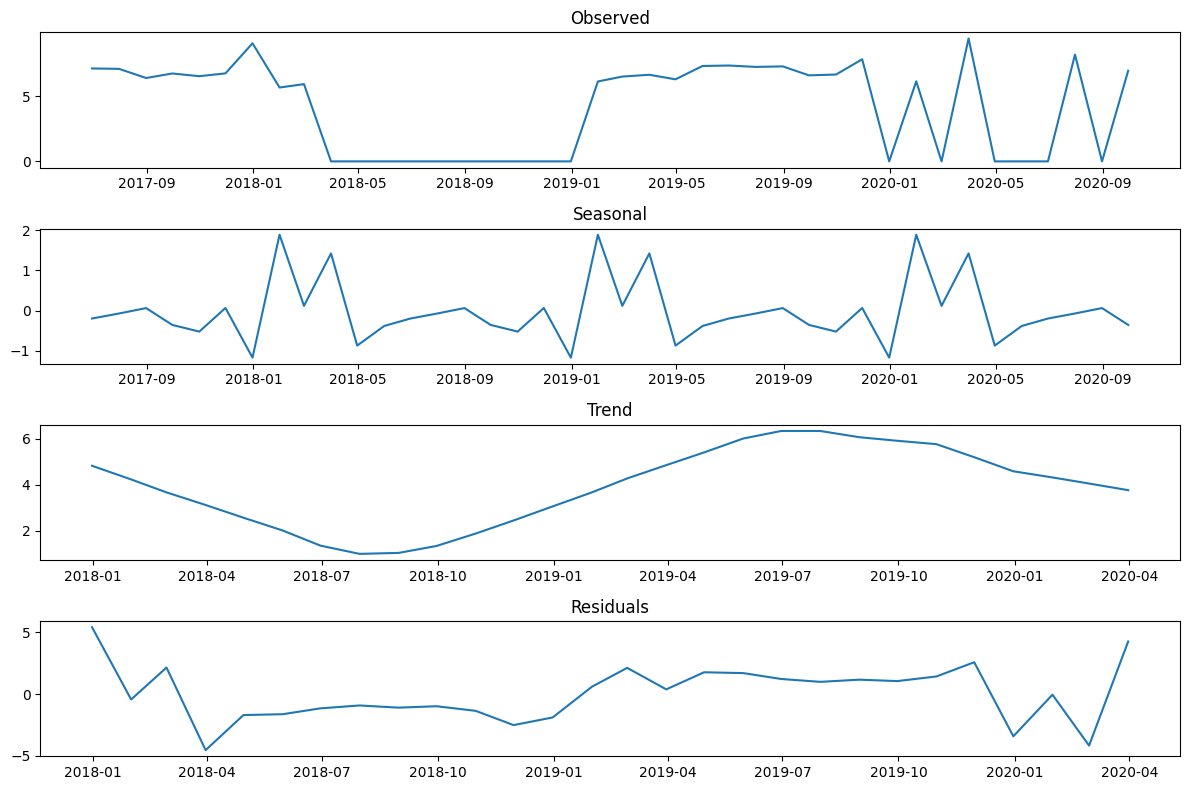

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Combine 'YEAR' and 'MONTH' columns into a date column
dataset['Date'] = pd.to_datetime(dataset['YEAR'].astype(str) + '-' + dataset['MONTH'].astype(str), format='%Y-%m')

# Set 'Date' as the index
dataset.set_index('Date', inplace=True)

# Select the sales column you want to analyze (e.g., 'RETAIL SALES' or 'WAREHOUSE SALES')
sales_column = 'RETAIL SALES'  # Change this to the column you want to analyze

# Resample the data to monthly frequency (you can adjust the frequency as needed)
resampled_data = dataset[sales_column].resample('M').mean()

# Fill missing values with zero
resampled_data = resampled_data.fillna(0)

# Perform seasonal decomposition
result = seasonal_decompose(resampled_data, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

# Seasonal component
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')

# Trend component
plt.subplot(4, 1, 3)
plt.plot(result.trend)
plt.title('Trend')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()


**3.4 - Calculate the total sales for each item type and identify which item type contributes the most to overall sales.**

In [ ]:
# Group the data by 'ITEM TYPE' and calculate the total sales for each item type
item_type_sales = dataset.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate the total sales (retail + warehouse) for each item type
item_type_sales['TOTAL SALES'] = item_type_sales['RETAIL SALES'] + item_type_sales['WAREHOUSE SALES']

# Identify the item type that contributes the most to overall sales
most_contributing_type = item_type_sales[item_type_sales['TOTAL SALES'] == item_type_sales['TOTAL SALES'].max()]

# Display the total sales for each item type and the most contributing item type
print("Total Sales for Each Item Type:")
print(item_type_sales)

print("\nItem Type Contributing the Most to Overall Sales:")
print(most_contributing_type[['ITEM TYPE', 'TOTAL SALES']])


Total Sales for Each Item Type:
      ITEM TYPE  RETAIL SALES  WAREHOUSE SALES  TOTAL SALES
0          BEER     574220.53       6527236.51   7101457.04
1       DUNNAGE          0.00       -121307.00   -121307.00
2          KEGS          0.00        118431.00    118431.00
3        LIQUOR     802691.43         94906.27    897597.70
4   NON-ALCOHOL      27150.31         26149.59     53299.90
5           REF        663.63             0.00       663.63
6  STR_SUPPLIES       2234.90             0.00      2234.90
7          WINE     746498.59       1156984.91   1903483.50

Item Type Contributing the Most to Overall Sales:
  ITEM TYPE  TOTAL SALES
0      BEER   7101457.04


**3.5 - visualizing total sales for each item type**

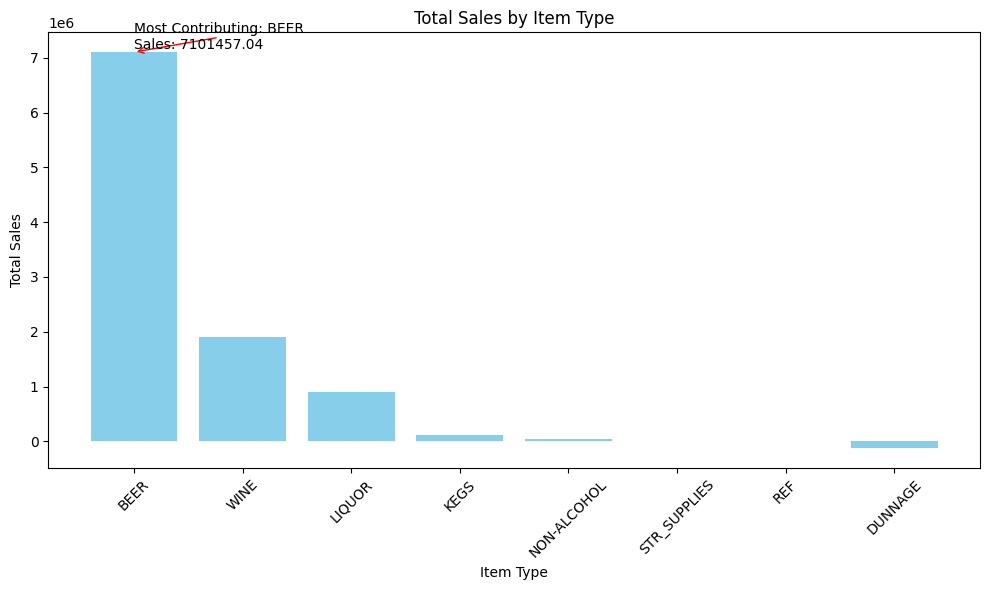

In [ ]:
# Group the data by 'ITEM TYPE' and calculate the total sales for each item type
item_type_sales = dataset.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate the total sales (retail + warehouse) for each item type
item_type_sales['TOTAL SALES'] = item_type_sales['RETAIL SALES'] + item_type_sales['WAREHOUSE SALES']

# Sort the item types by total sales in descending order
item_type_sales = item_type_sales.sort_values(by='TOTAL SALES', ascending=False)

# Create a bar plot to visualize total sales for each item type
plt.figure(figsize=(10, 6))
plt.bar(item_type_sales['ITEM TYPE'], item_type_sales['TOTAL SALES'], color='skyblue')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Identify the item type contributing the most to overall sales
most_contributing_type = item_type_sales.iloc[0]['ITEM TYPE']
most_contributing_sales = item_type_sales.iloc[0]['TOTAL SALES']

# Annotate the item type contributing the most
plt.annotate(f'Most Contributing: {most_contributing_type}\nSales: {most_contributing_sales}',
             xy=(0, most_contributing_sales), xytext=(0, most_contributing_sales + 50000),
             arrowprops=dict(arrowstyle='->', color='red'))

# Show the plot
plt.tight_layout()
plt.show()


**3.5.1  - visualizing total sales for each item type in pie chart**

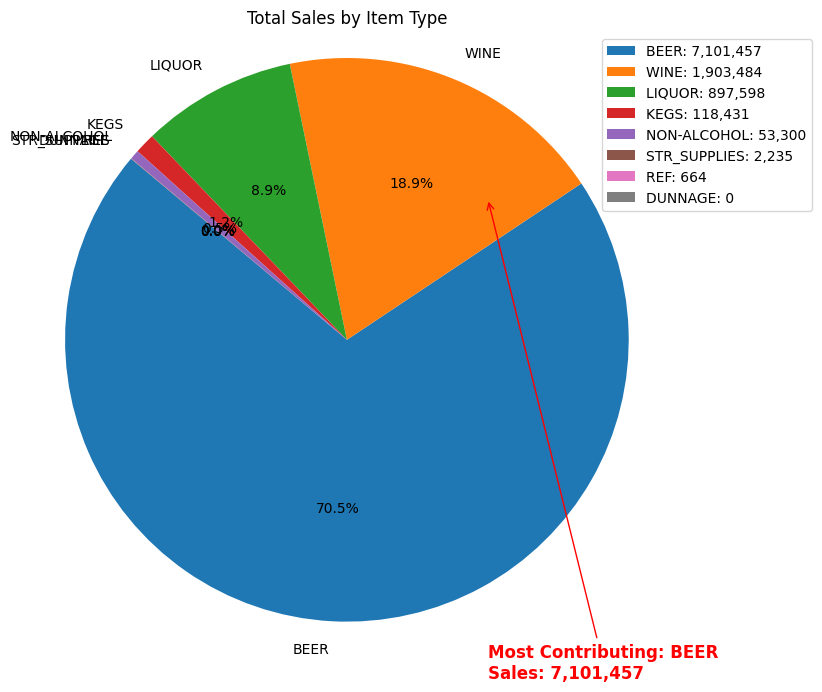

In [ ]:
# Group the data by 'ITEM TYPE' and calculate the total sales for each item type
item_type_sales = dataset.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate the total sales (retail + warehouse) for each item type
item_type_sales['TOTAL SALES'] = item_type_sales['RETAIL SALES'] + item_type_sales['WAREHOUSE SALES']

# Sort the item types by total sales in descending order
item_type_sales = item_type_sales.sort_values(by='TOTAL SALES', ascending=False)

# Ensure all values are non-negative
item_type_sales['TOTAL SALES'] = item_type_sales['TOTAL SALES'].clip(lower=0)

# Extract item types and total sales
item_types = item_type_sales['ITEM TYPE']
total_sales = item_type_sales['TOTAL SALES']

# Create a pie chart to visualize total sales by item type
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=item_types, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Total Sales by Item Type')

# Identify the item type contributing the most to overall sales
most_contributing_type = item_type_sales.iloc[0]['ITEM TYPE']
most_contributing_sales = item_type_sales.iloc[0]['TOTAL SALES']

# Add a legend to the pie chart
plt.legend(labels=[f'{item}: {sales:,.0f}' for item, sales in zip(item_types, total_sales)], loc='best', bbox_to_anchor=(0.9, 1))

# Annotate the item type contributing the most
plt.annotate(f'Most Contributing: {most_contributing_type}\nSales: {most_contributing_sales:,.0f}',
             xy=(0.5, 0.5), xytext=(0.5, -1.2),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red', weight='bold')

# Show the pie chart
plt.show()
